# **PART 1 : Probability & Statistics questions**

**1** \
The probability of passing the interview for three candidates are:
P(A) = 0.60, P(B) = 0.10, P(C) = 0.20 \
The probability of at least two candidates passing can be expressed as:\
P(at least two pass) = P(exactly two pass) + P(all three pass) \
Where: \
* P(exactly two pass) = P(A ⋂ B ⋂ ¬C ) + P(A ⋂ ¬ B ⋂ C) + P( ¬ A ⋂ B ⋂ C) \
* P(all three pass)= P(A ∩ B ∩ C) \

P(at least two pass) = [P(A) * P(B) * (1 - P(C))] + [P(A) * P(C) * (1 - P(B)] + [P(B) * P(C) * (1 - P(A))] + [P(A) * P(B) * P(C)]
P(at least two pass) = 0.6 * 0.1 * 0.8 + 0.6 * 0.9 * 0.2 + 0.1 * 0.2 * 0.4 + 06 * 0.1 * 0.2 = 0.176
\
\
**2** \
A = "Drawing 5 diamonds, 2 hearts, and 2 kings" \
Case 1: 1 King is from diamonds (so 1 of the 5 diamonds is a king and the other king is not from hearts) => A1 = $ C{^{4}_{12}}  * C{^{1}_{2}} *  C{^{2}_{12}}  * C{^{1}_{24}} $ = 1568160\
Case 2: 1 King is from diamonds and 1 King is from hearts => A2 = $ C{^{4}_{12}}  *  C{^{1}_{12}}  *  C{^{2}_{24}} $ = 1639440\
Case 3: 1 King is from hearts (so 1 of the 2 hearts is a king the other king is not from diamonds)  => A3 = $ C{^{1}_{12}} * C{^{1}_{2}} *  C{^{5}_{12}}  * C{^{1}_{24}} $ = 456192\
Case 4: King is not from both diamonds and hearts => A4 =  $ C{^{5}_{12}}  *  C{^{2}_{12}}$ = 52272 \
P(A) = $$ \frac{(A1 + A2 + A3 + A4)}{C{^{9}_{52}}}  = 1,0101.10^{-3}$$
\
**3** \
Call the Bank as 𝑋  and Fraud as 𝑌 \
Given: \
P(X = A) = 0.3 \
P(X = B) = 0.2 \
P(X = C) = 0.5 \
The fraud rates for each bank: \
P(Y|X = A) = 0.03 \
P(Y|X = B) = 0.05 \
P(Y|X = C) = 0.04 

Bayes' Theorem: 
$$ P(X|Y) = \frac{P(Y|X).P(X)}{P(Y)} $$ 
$$ => P(Y)= P(Y∣X=A)⋅P(X=A) + P(Y∣X=B)⋅P(X=B) + P(Y∣X=C)⋅P(X=C) = 0.039 $$ 

$$ 
P(X=A|Y) = \frac{P(Y|X=A) \cdot P(X=A)}{P(Y)} = \frac{0.03 \times 0.30}{0.039} = \frac{0.009}{0.039} \approx 0.2308
$$
$$
P(X=B|Y) = \frac{P(Y|X=B) \cdot P(X=B)}{P(Y)} = \frac{0.05 \times 0.20}{0.039} = \frac{0.01}{0.039} \approx 0.2564
$$
$$
P(X=C|Y) = \frac{P(Y|X=C) \cdot P(X=C)}{P(Y)} = \frac{0.04 \times 0.50}{0.039} = \frac{0.02}{0.039} \approx 0.5128
$$ \
The bank most likely involved in the event of fraud detection is Bank C with a probability of about 51.28%. \
\
**4** \

- Sample mean: $\bar{x} = 525,000 \, \text{VND}$
- Sample standard deviation: $s = 28,340 \, \text{VND}$
- Sample size: $n = 250,000$
- $Z_{\alpha/2}$ = 1.645

To calculate the 90% confidence interval (CI) for the population mean
μ, we use the formula for a confidence interval based on the Z-distribution:  
$$  CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} $$ 
$$ => 524 907  \leq \mu \leq  525 093 $$
The 90% confidence interval for the population mean $\mu$ is approximately:
$$(524 907 \, \text{VND}, 525 093 \, \text{VND})$$

# **PART 2 : Data & Coding**

# Setup And Initial Data Analysis

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/transaction_data.csv'
transaction_data = pd.read_csv(file_path)
transaction_data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [5]:
transaction_data.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


# Data cleaning and transformation stages

In [6]:
# Renaming the column
transaction_data = transaction_data.rename(columns={"NumberOfItemsPurchased":"Quantity"})

# Customers ordered negative quantity, which is not possible. So i filter quantity grater then zero
data_cleaned = transaction_data[transaction_data["Quantity"] > 0]

# Similar to the CostPerItem column
data_cleaned = data_cleaned[(data_cleaned["CostPerItem"] > 0)]

# ItemCode without code (its value is -1), i also remove them
data_cleaned = data_cleaned[(data_cleaned['ItemCode'] > 0)]


In [7]:
# Convert 'TransactionTime' to datetime format
data_cleaned['TransactionTime'] = pd.to_datetime(data_cleaned['TransactionTime'])

# Ensure 'YearMonth' is a period in 'YearMonth' format (this should already be done)
data_cleaned['YearMonth'] = data_cleaned['TransactionTime'].dt.to_period('M')

# Drop rows where 'YearMonth' is after September 2024
data_cleaned = data_cleaned[data_cleaned['YearMonth'] <= '2024-09']

<ipython-input-7-218052b86ada>:2: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data_cleaned['TransactionTime'] = pd.to_datetime(data_cleaned['TransactionTime'])


In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050110 entries, 0 to 1083817
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   UserId           1050110 non-null  int64         
 1   TransactionId    1050110 non-null  int64         
 2   TransactionTime  1050110 non-null  datetime64[ns]
 3   ItemCode         1050110 non-null  int64         
 4   ItemDescription  1050110 non-null  object        
 5   Quantity         1050110 non-null  int64         
 6   CostPerItem      1050110 non-null  float64       
 7   Country          1050110 non-null  object        
 8   YearMonth        1050110 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(4), object(2), period[M](1)
memory usage: 80.1+ MB


In [9]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 UserId             0
TransactionId      0
TransactionTime    0
ItemCode           0
ItemDescription    0
Quantity           0
CostPerItem        0
Country            0
YearMonth          0
dtype: int64


In [10]:
# # Step 1: Create a mapping of 'itemcode' to 'description' for non-null values
# itemcode_description_map = data_cleaned.dropna(subset=['ItemDescription']).set_index('ItemCode')['ItemDescription'].to_dict()

# # Step 2: Fill missing 'description' directly using the 'map' function
# data_cleaned['ItemDescription'] = data_cleaned['ItemDescription'].fillna(data_cleaned['ItemCode'].map(itemcode_description_map))


In [11]:
# Remove duplicate rows, if any
data_cleaned = data_cleaned.drop_duplicates()

data_cleaned.shape

(519782, 9)

In [12]:
# Ensure numerical columns are correctly typed
data_cleaned['Quantity'] = pd.to_numeric(data_cleaned['Quantity'], errors='coerce')
data_cleaned['CostPerItem'] = pd.to_numeric(data_cleaned['CostPerItem'], errors='coerce')

# Check if all columns have the correct data types
print(data_cleaned.dtypes)

UserId                      int64
TransactionId               int64
TransactionTime    datetime64[ns]
ItemCode                    int64
ItemDescription            object
Quantity                    int64
CostPerItem               float64
Country                    object
YearMonth               period[M]
dtype: object


<ipython-input-12-2589362f1026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Quantity'] = pd.to_numeric(data_cleaned['Quantity'], errors='coerce')
<ipython-input-12-2589362f1026>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['CostPerItem'] = pd.to_numeric(data_cleaned['CostPerItem'], errors='coerce')


In [13]:
data_cleaned.describe()

,UserId,TransactionId,TransactionTime,ItemCode,Quantity,CostPerItem
count,519782.000000,5.197820e+05,519782,5.197820e+05,519782.000000,5.197820e+05
mean,241088.495454,6.160941e+06,2018-09-16 16:23:23.337322496,6.606508e+05,31.951776,7.796539e+00
min,-1.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.000000,6.000000e-02
25%,259392.000000,6.029870e+06,2018-06-10 09:53:00,4.614960e+05,3.000000,1.730000e+00
50%,302148.000000,6.168503e+06,2018-10-01 12:17:00,4.753770e+05,12.000000,2.880000e+00
75%,341481.000000,6.290713e+06,2018-12-31 09:58:00,4.889640e+05,36.000000,5.700000e+00
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,242985.000000,1.696285e+06
std,142402.295499,1.469041e+05,NaN,4.503912e+05,470.918858,2.352820e+03


# Filter Outliers
I'm using Interquartile Range (IQR) method to detect outliers. This is a robust statistical technique commonly used to identify data points that lie far from the central 50% of the data distribution. The IQR method is particularly effective because it is resistant to extreme values and non-normally distributed data. The IQR method does not rely on the mean and standard deviation, making it suitable for datasets with skewed distributions. 
I treat outliers by removing them from the dataset. This works well if the outliers are clearly erroneous or irrelevant.

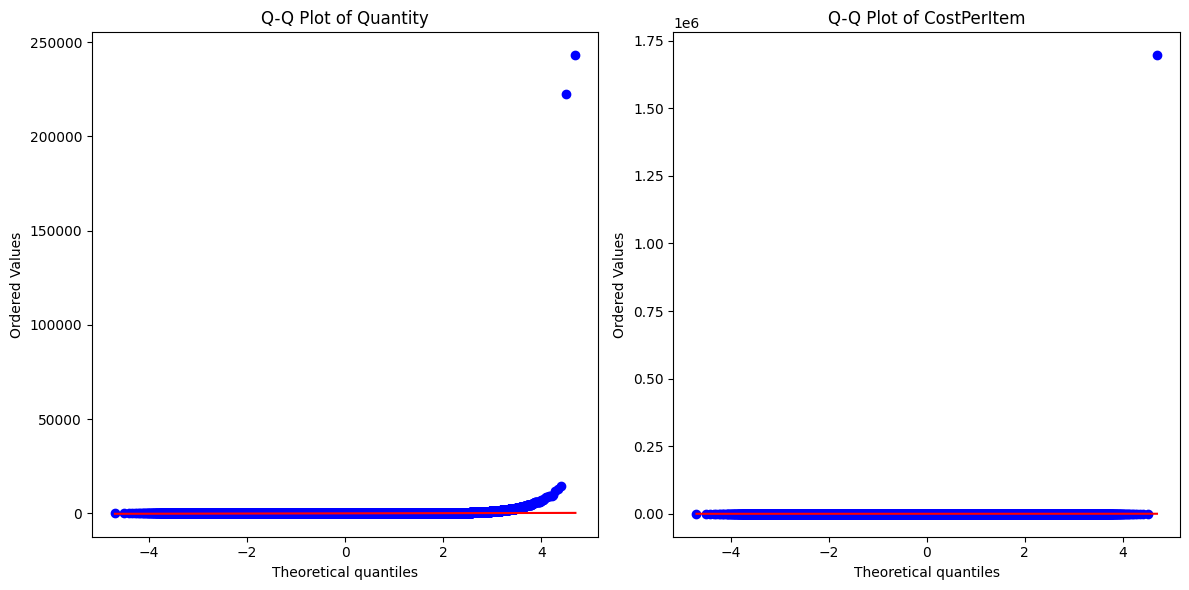

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data_cleaned['Quantity'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Quantity')

plt.subplot(1, 2, 2)
stats.probplot(data_cleaned['CostPerItem'], dist="norm", plot=plt)
plt.title('Q-Q Plot of CostPerItem')

plt.tight_layout()
plt.show()

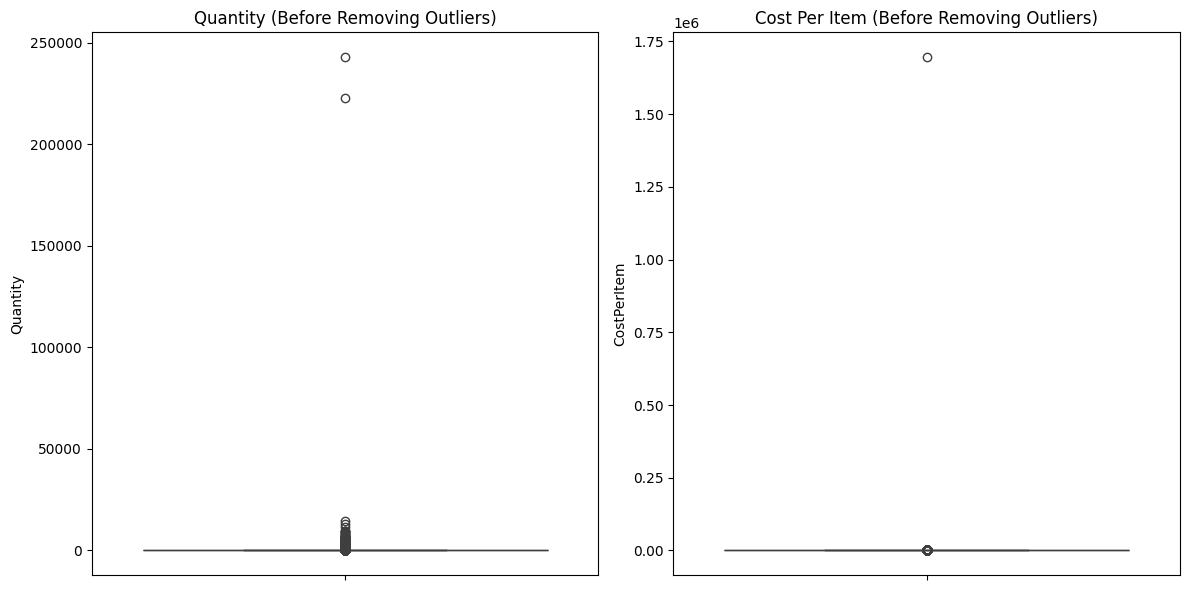

In [15]:
# Boxplot for NumberOfItemsPurchased and CostPerItem before removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data_cleaned['Quantity'])
plt.title('Quantity (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data_cleaned['CostPerItem'])
plt.title('Cost Per Item (Before Removing Outliers)')

plt.tight_layout()
plt.show()

In [16]:
def filter_outliers_iqr(df, column_name, multiplier=1.5):

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Filter out the outliers
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_cleaned

In [17]:
data_cleaned = filter_outliers_iqr(data_cleaned, 'Quantity')
data_cleaned = filter_outliers_iqr(data_cleaned, 'CostPerItem')
data_cleaned.shape

(457854, 9)

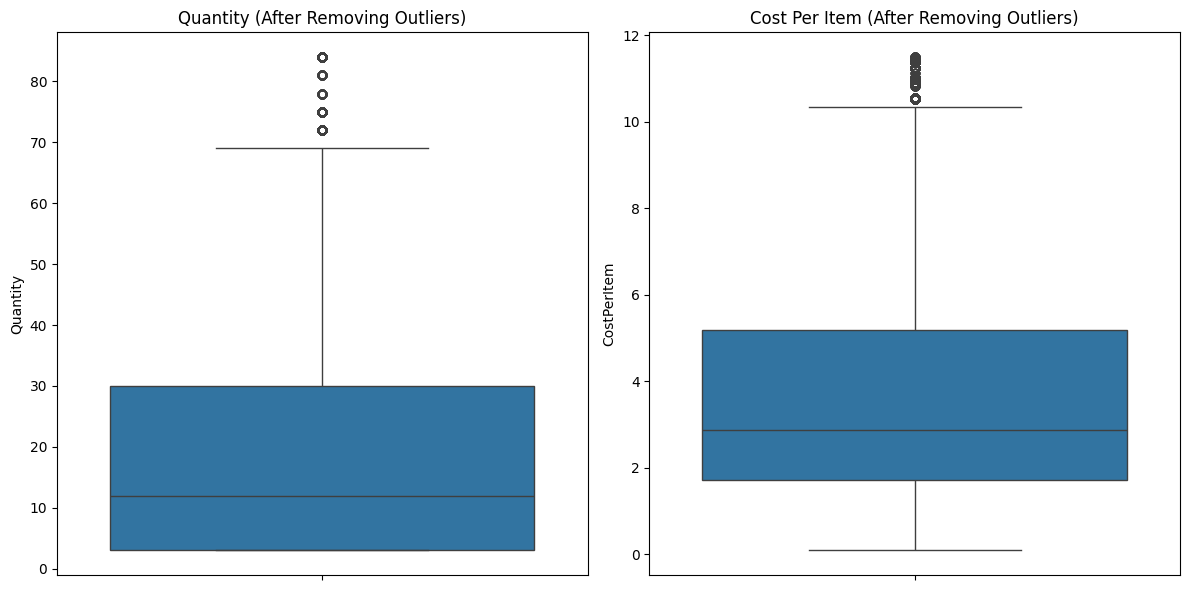

In [18]:
# Boxplot for NumberOfItemsPurchased and CostPerItem after removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data_cleaned['Quantity'])
plt.title('Quantity (After Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data_cleaned['CostPerItem'])
plt.title('Cost Per Item (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [19]:
data_cleaned.describe()

,UserId,TransactionId,TransactionTime,ItemCode,Quantity,CostPerItem
count,457854.000000,4.578540e+05,457854,4.578540e+05,457854.000000,457854.000000
mean,241439.342408,6.162429e+06,2018-09-17 20:13:00.752990720,6.621586e+05,18.614914,3.588150
min,-1.000000,5.900015e+06,2018-02-12 04:26:00,6.300000e+01,3.000000,0.090000
25%,259434.000000,6.031487e+06,2018-06-11 08:43:00,4.606560e+05,3.000000,1.730000
50%,302715.000000,6.170186e+06,2018-10-03 05:20:00,4.755240e+05,12.000000,2.880000
75%,342636.000000,6.292605e+06,2019-01-01 08:34:00,4.890060e+05,30.000000,5.180000
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,84.000000,11.500000
std,142584.518514,1.468766e+05,NaN,4.519426e+05,19.259818,2.663222


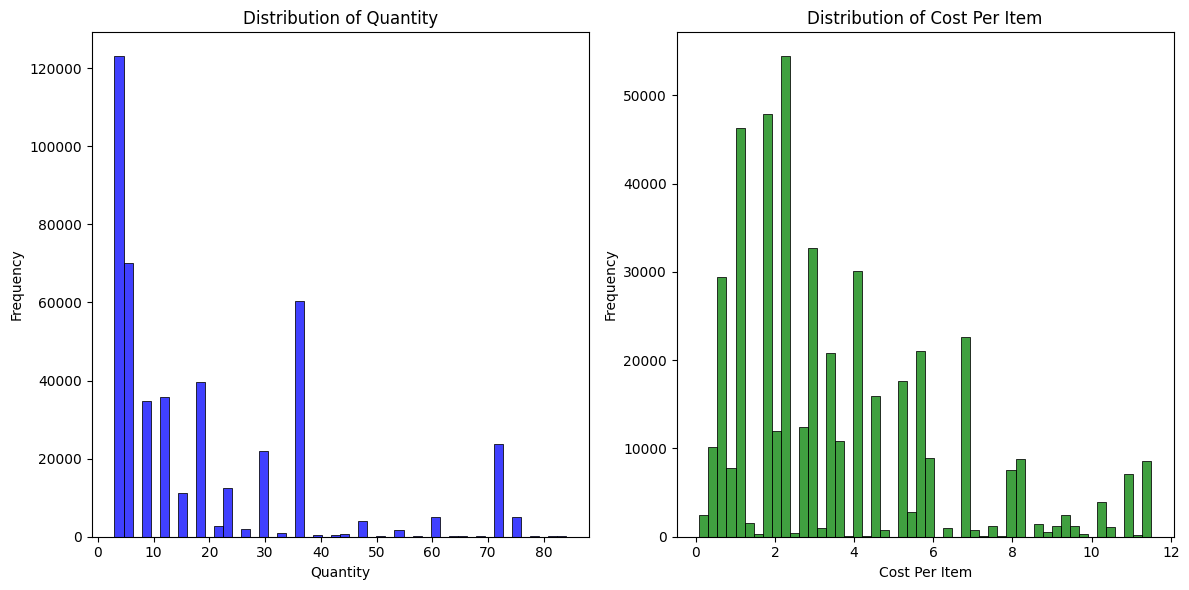

In [20]:
plt.figure(figsize=(12, 6))

# First subplot for 'Quantity'
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Quantity'], bins=50, kde=False, color='blue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Second subplot for 'CostPerItem'
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['CostPerItem'], bins=50, kde=False, color='green')
plt.title('Distribution of Cost Per Item')
plt.xlabel('Cost Per Item')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# The number of Items purchased and prices in each month

   YearMonth  total_items_purchased  total_cost
0    2018-02                 462159  1369374.90
1    2018-03                 337926   882955.53
2    2018-04                 459105  1258879.74
3    2018-05                 516846  1357199.01
4    2018-06                 590895  1494948.36
5    2018-07                 581046  1555510.20
6    2018-08                 560640  1472926.44
7    2018-09                 585777  1491577.41
8    2018-10                 658926  1607913.36
9    2018-11                 683502  1769009.04
10   2018-12                1072944  2743003.11
11   2019-01                1155939  3000071.37
12   2019-02                 857208  2329370.52


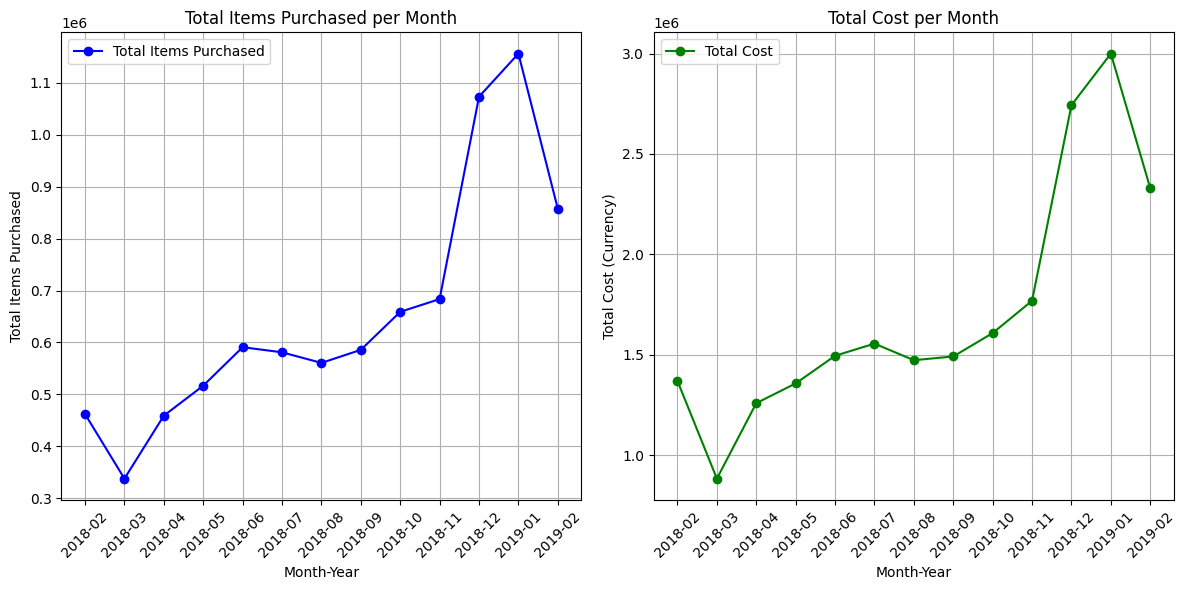

In [21]:
# Convert 'TransactionTime' to datetime format
data_cleaned['TransactionTime'] = pd.to_datetime(data_cleaned['TransactionTime'])

# Extract year and month from 'TransactionTime'
data_cleaned['YearMonth'] = data_cleaned['TransactionTime'].dt.to_period('M')

# Total cost = NumberOfItemsPurchased * CostPerItem
data_cleaned['TotalCost'] = data_cleaned['Quantity'] * data_cleaned['CostPerItem']

# Group by the 'YearMonth' to get monthly totals
monthly_summary = data_cleaned.groupby('YearMonth').agg(
    total_items_purchased=('Quantity', 'sum'),
    total_cost=('TotalCost', 'sum')
).reset_index()

# Display the monthly summary
print(monthly_summary)
# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Plot 1: Total Items Purchased over Time (YearMonth)
plt.subplot(1, 2, 1)
plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['total_items_purchased'], marker='o', color='blue', label='Total Items Purchased')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Items Purchased')
plt.title('Total Items Purchased per Month')
plt.grid(True)
plt.legend()

# Plot 2: Total Cost over Time (YearMonth)
plt.subplot(1, 2, 2)
plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['total_cost'], marker='o', color='green', label='Total Cost')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Cost (Currency)')
plt.title('Total Cost per Month')
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap and improve display
plt.tight_layout()

# Show the plot
plt.show()

# Report about the efficiency of selling

In [22]:
# Group data by 'YearMonth' for monthly summary
monthly_efficiency = data_cleaned.groupby('YearMonth').agg(
    total_cost=('TotalCost', 'sum'),  # Total cost for each month
    avg_price_per_item=('CostPerItem', 'mean'),  # Average price per item in the month
    avg_items_per_transaction=('Quantity', 'mean'),  # Average number of items purchased per transaction
    total_items_sold=('Quantity', 'sum')  # Total number of items sold in each month
).reset_index()

# Calculate sales growth rate (percentage change in total cost month to month)
monthly_efficiency['sales_growth_rate'] = monthly_efficiency['total_cost'].pct_change() * 100

# Display the monthly efficiency summary
print(monthly_efficiency)

   YearMonth  total_cost  avg_price_per_item  avg_items_per_transaction  \
0    2018-02  1369374.90            3.844383                  16.196783   
1    2018-03   882955.53            3.610803                  16.600806   
2    2018-04  1258879.74            3.798215                  17.649739   
3    2018-05  1357199.01            3.728637                  18.739205   
4    2018-06  1494948.36            3.585213                  18.714607   
5    2018-07  1555510.20            3.740060                  19.885896   
6    2018-08  1472926.44            3.684748                  19.156701   
7    2018-09  1491577.41            3.462487                  17.766431   
8    2018-10  1607913.36            3.430670                  21.695894   
9    2018-11  1769009.04            3.521799                  20.115424   
10   2018-12  2743003.11            3.525494                  20.320524   
11   2019-01  3000071.37            3.456115                  18.243987   
12   2019-02  2329370.52 

# The number of items purchased for each userID in 30 days for each day

In [23]:
data_cleaned = data_cleaned[data_cleaned['UserId'] > -1]
# Ensure 'TransactionTime' is in datetime format
data_cleaned['TransactionTime'] = pd.to_datetime(data_cleaned['TransactionTime'], errors='coerce')

# Extract only the date part of 'TransactionTime' as a period and then convert to timestamp for easier calculations
data_cleaned['TransactionDate'] = data_cleaned['TransactionTime'].dt.to_period('D').dt.to_timestamp()

# Step 1: Group by 'UserId' and 'TransactionDate', and calculate the total 'Quantity' for each day
daily_totals = data_cleaned.groupby(['UserId', 'TransactionDate']).agg({'Quantity': 'sum'}).reset_index()

# Step 2: Initialize an empty column for the 30-day sum
daily_totals['Quantity_30days'] = 0

# Step 3: Iterate over each 'UserId'
for user_id, group in daily_totals.groupby('UserId'):
    # Sort the group by 'TransactionDate' to maintain chronological order
    group = group.sort_values('TransactionDate')

    # Iterate over each transaction date for the current 'UserId'
    for i, current_row in group.iterrows():
        # Define the date range (the last 30 days including the current date)
        current_date = current_row['TransactionDate']  # 'TransactionDate' is already a timestamp
        start_date = current_date - timedelta(days=30)

        # Find all rows within this 30-day period
        mask = (group['TransactionDate'] > start_date) & (group['TransactionDate'] <= current_date)

        # Sum the 'Quantity' for the rows in the last 30 days
        quantity_30days = group.loc[mask, 'Quantity'].sum()

        # Update the 'Quantity_30days' column for the current row in the original dataframe
        daily_totals.loc[current_row.name, 'Quantity_30days'] = quantity_30days

# Display the dataframe
print(daily_totals[['UserId', 'TransactionDate', 'Quantity', 'Quantity_30days']])

<ipython-input-23-d37b76d9fe31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TransactionTime'] = pd.to_datetime(data_cleaned['TransactionTime'], errors='coerce')
<ipython-input-23-d37b76d9fe31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TransactionDate'] = data_cleaned['TransactionTime'].dt.to_period('D').dt.to_timestamp()


       UserId TransactionDate  Quantity  Quantity_30days
0      259287      2018-04-09       936              936
1      259287      2018-06-19       612              612
2      259287      2018-08-21       474              474
3      259287      2018-10-14       714              714
4      259287      2019-01-12      1644             1644
...       ...             ...       ...              ...
15529  383943      2019-02-11       396             1305
15530  383943      2019-02-17       426             1731
15531  384027      2018-08-03       840              840
15532  384027      2018-12-24      1422             1422
15533  384027      2019-01-09        72             1494

[15534 rows x 4 columns]


# Recommendation system
I will classify products into three different clusters based on customer purchasing behavior. Each customer will be grouped into a corresponding cluster. For each cluster, customers will be recommended the best-selling products within that cluster if they have not yet purchased them.

A process to recommend products to customers based on their purchase behavior and clusters them using K-Means clustering: 
1. **Label Encoding 'Country'**: transform the 'Country' column into numerical values, which makes the data suitable for machine learning algorithms.
2. **Feature Selection**: The relevant features (UserId, ItemCode, CostPerItem, Country, and Quantity) are selected and stored in data_cleaned.
3. **Scaling Features**: The CostPerItem and Quantity columns are scaled using StandardScaler() to standardize the data. This is important for clustering since K-Means is sensitive to the scale of input features.
4. **K-Means Clustering**: K-Means clustering with 3 clusters (n_clusters=3) is applied to the scaled data (Because n_clusters = 3 is the most optimal case). Customers are grouped into clusters based on their purchasing behavior (i.e., CostPerItem, Country, and Quantity). The cluster assignment is saved in the Cluster column.
5. **Best-Selling Products Per Cluster**: For each cluster, the total quantity of each product (based on ItemCode) is calculated, and the top 10 best-selling products are identified for each cluster.
6. **Product Recommendations:** For each customer in a cluster, the code generates product recommendations by Identifying products the customer has not yet purchased and Recommending the top 3 best-selling products in that cluster that the customer hasn't bought yet.




In [24]:
data_cleaned.describe()

,UserId,TransactionId,TransactionTime,ItemCode,Quantity,CostPerItem,TotalCost,TransactionDate
count,343688.000000,3.436880e+05,343688,3.436880e+05,343688.000000,343688.000000,343688.000000,343688
mean,321640.798762,6.168899e+06,2018-09-23 11:54:54.297443840,6.452514e+05,22.184566,3.301756,54.672011,2018-09-23 02:38:41.677800704
min,259287.000000,5.900015e+06,2018-02-12 04:26:00,2.100420e+05,3.000000,0.090000,0.270000,2018-02-12 00:00:00
25%,293748.000000,6.043906e+06,2018-06-20 09:14:00,4.616850e+05,6.000000,1.730000,17.280000,2018-06-20 00:00:00
50%,319578.000000,6.183122e+06,2018-10-14 10:21:00,4.760280e+05,15.000000,2.340000,42.480000,2018-10-14 00:00:00
75%,353073.000000,6.294640e+06,2019-01-02 11:18:00,4.889010e+05,36.000000,4.080000,72.360000,2019-01-02 00:00:00
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,84.000000,11.450000,887.040000,2019-02-20 00:00:00
std,35881.279928,1.437626e+05,NaN,4.313079e+05,20.249063,2.551205,56.706829,NaN


<ipython-input-25-62f1eb682007>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_new['Country'] = encoder.fit_transform(data_cleaned['Country'])
<ipython-input-25-62f1eb682007>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_new[['Quantity', 'CostPerItem']] = scaler.fit_transform(data_cleaned_new[['Quantity', 'CostPerItem']])


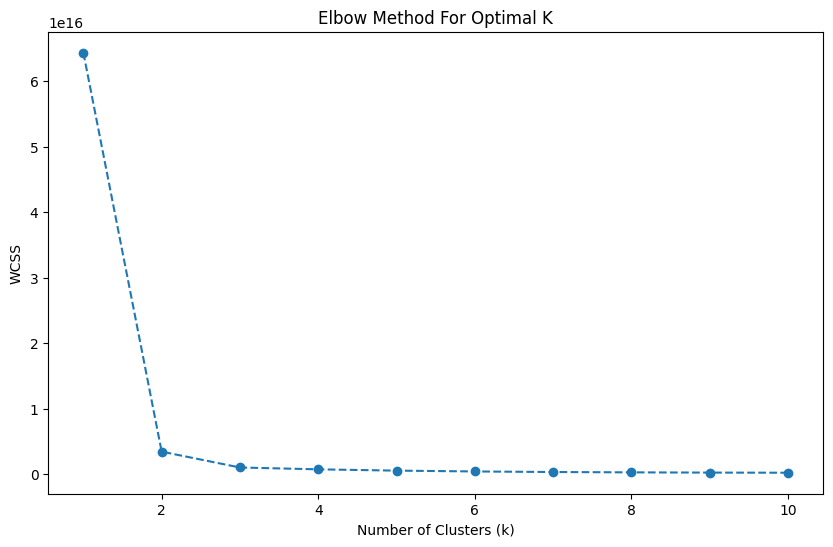

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Step 1: Keep the required columns
data_cleaned_new = data_cleaned[['UserId', 'ItemCode', 'Quantity', 'CostPerItem', 'Country']]

# Step 2: Encode the 'Country' column
encoder = LabelEncoder()
data_cleaned_new['Country'] = encoder.fit_transform(data_cleaned['Country'])

# Step 3: Normalize the data (K-Means performs better when features are scaled)
scaler = StandardScaler()
data_cleaned_new[['Quantity', 'CostPerItem']] = scaler.fit_transform(data_cleaned_new[['Quantity', 'CostPerItem']])

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_cleaned_new)
    wcss.append(kmeans.inertia_)  # WCSS or inertia

# Step 5: Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()



In [26]:
from collections import Counter

# Step 1: Label encode 'Country' column
le = LabelEncoder()
data_cleaned['Country'] = le.fit_transform(data_cleaned['Country'])

# Step 2: Keeping the relevant features ('UserId', 'ItemCode', 'CostPerItem', 'Country', 'Quantity')
data_cleaned = data_cleaned[['UserId', 'ItemCode', 'CostPerItem', 'Country', 'Quantity']]

# Step 3: Scaling 'CostPerItem' and 'Quantity'
scaler = StandardScaler()
scaled_data = data_cleaned.copy()
scaled_data[['Quantity', 'CostPerItem']] = scaler.fit_transform(scaled_data[['Quantity', 'CostPerItem']])

# Step 4: Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
scaled_data['Cluster'] = kmeans.fit_predict(scaled_data[['CostPerItem', 'Country', 'Quantity']])

# Step 5: Analyze cluster sizes
cluster_frequencies = Counter(scaled_data['Cluster'])

# Step 6: Identify the top 10 best-selling products in each cluster based on total quantity sold
best_selling_products = scaled_data.groupby(['Cluster', 'ItemCode'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])

# Get the top 10 products for each cluster
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

# Step 7: Generate product recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]

    # Extract unique customers in the cluster
    customers_in_cluster = scaled_data[scaled_data['Cluster'] == cluster]['UserId'].unique()

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        purchased_products = scaled_data[(scaled_data['UserId'] == customer) &
                                         (scaled_data['Cluster'] == cluster)]['ItemCode'].tolist()

        # Find the top 3 products that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['ItemCode'].isin(purchased_products)]
        top_3_products = top_products_not_purchased.head(3)

        # Append recommendations to the list
        recommendations.append([customer, cluster] + top_3_products[['ItemCode', 'Quantity']].values.flatten().tolist())

# Step 8: Create a DataFrame from the recommendations list
recommendations_df = pd.DataFrame(recommendations, columns=['UserId', 'Cluster',
                                                             'Rec1_ItemCode', 'Rec1_Quantity',
                                                             'Rec2_ItemCode', 'Rec2_Quantity',
                                                             'Rec3_ItemCode', 'Rec3_Quantity'])


print(recommendations_df.head())

   UserId  Cluster  Rec1_ItemCode  Rec1_Quantity  Rec2_ItemCode  \
0  339822        0       445452.0    1146.260623      1787079.0   
1  328440        0      1782459.0     742.736691       451458.0   
2  316848        0       445452.0    1146.260623      1787079.0   
3  369852        0       445452.0    1146.260623      1782459.0   
4  278985        0       339381.0     886.819972      1782459.0   

   Rec2_Quantity  Rec3_ItemCode  Rec3_Quantity  
0     979.214533       339381.0     886.819972  
1     713.132513       451437.0     547.741747  
2     979.214533       339381.0     886.819972  
3     742.736691       461517.0     689.770389  
4     742.736691       461517.0     689.770389  
